## Accurate Product Demand Forecasting for Favorita Stores

1. Business Understanding

### Project Understanding.
**Background.**
Corporation Favorita, a prominent grocery retailer based in Ecuador, aims to ensure optimal stock levels across its various stores to meet customer demand without overstocking. The marketing and sales teams have provided historical sales data to support this objective.

**Goal.**
The primary goal is to develop machine learning models that accurately forecast product demand across different Favorita stores. This will help in maintaining appropriate inventory levels, reducing stockouts and overstock situations, thereby optimizing sales and customer satisfaction.

**Objectives.**
- Predict Unit Sales: Develop a model to predict the unit sales of products at various Favorita stores.
- Analyze Sales Trends: Examine historical sales data to identify trends, patterns, and factors influencing sales.
- Incorporate External Factors: Consider external factors like promotions, oil prices, holidays, and significant events (e.g., earthquakes) in the model.
- Evaluate Store Performance: Compare sales performance across different stores, regions, and product families.
- Optimize Inventory Management: Use the predictions to improve inventory management and supply chain decisions.

**Business Questions and Hypotheses.**
**Business Questions.**
1. **How do promotional activities impact product sales across different store clusters?**
   - Analyze the effect of promotions on sales to understand which product families benefit the most from promotional activities in various store clusters.

2. **What are the key factors driving sales variability across different cities and states?**
   - Identify and quantify the influence of location-based factors such as city, state, store type, and local events on sales variability.

3. **How do economic indicators, such as daily oil prices, correlate with sales performance?**
   - Examine the relationship between daily oil prices and sales figures to determine if economic conditions significantly influence consumer purchasing behavior.

4. **What is the effect of holidays and events on store transactions and sales?**
   - Evaluate the impact of national and local holidays, events, and transferred dates on store transactions and sales to optimize inventory during these periods.

5. **Can historical transaction data improve the accuracy of future sales forecasts?**
   - Assess the contribution of past transaction data to the predictive power of sales forecasting models and determine its role in improving forecast accuracy.
**Hypotheses**
- Null Hypothesis: Promotions do not have a significant effect on the sales of products.
- Alternative Hypothesis: Promotions have a significant effect on the sales of products.


**Data Description and Sources.**
- train.csv: Historical sales data, including dates, store numbers, product family, on-promotion status, and sales figures.
- test.csv: Test data for predicting sales, with the same features as the training data.
- transaction.csv: Daily transactions per store.
- stores.csv: Metadata for stores, including city, state, type, and cluster.
- oil.csv: Daily oil prices, relevant for the economic context of Ecuador.
- holidays_events.csv: Information on holidays and events, including metadata and transferred dates.
- sample_submission.csv: Sample format for submitting predictions.

## Column description

1. **id**: Unique identifier for each record.
2. **date**: Date of the sales record.
3. **store_nbr**: Unique store number.
4. **family**: Category of the product.
5. **sales**: Number of units sold.
6. **onpromotion**: Number of items on promotion.
7. **year**: Year of the sales record.
8. **month**: Month of the sales record.
9. **week**: Week of the sales record.
10. **day_name**: Day of the week (e.g., Monday, Tuesday).
11. **city**: City where the store is located.
12. **state**: State where the store is located.
13. **type_x**: Type of the store.
14. **cluster**: Cluster/group of the store (similar stores are in the same cluster).
15. **transactions**: Number of transactions recorded in the store on the given date.
16. **dcoilwtico**: Daily oil price in Ecuador.
17. **type_y**: Type of holiday or event.
18. **locale**: Scope of the holiday or event (e.g., national, regional).
19. **locale_name**: Specific location name of the holiday or event.
20. **description**: Description of the holiday or event.
21. **transferred**: Indicator if the holiday or event was transferred to another date.



2. Data understanding

#### Importation of Necessary packages

In [60]:
#Import packages
import pyodbc    
from dotenv import dotenv_values
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 

warnings.filterwarnings('ignore')

#### Loading the Datasets

Creating a connection by accessing  connection string with the defined environment variables

In [11]:
# Import necessary libraries
from dotenv import dotenv_values
import pyodbc

# Loading environment variables from .env file
environment_variables = dotenv_values('.env')

# Getting the values for the credentials set in the .env file
server = environment_variables.get("SERVER")
database = environment_variables.get("DATABASE")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")

# Create a connection string
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password};MARS_Connection=yes;MinProtocolVersion=TLSv1.2;"
# Connecting to the server
try:
    connection = pyodbc.connect(connection_string)
    print("Connection successful")
except Exception as e:
    print(f"Connection failed: {e}")


Connection successful


In [12]:
# Define the SQL query to show specific tables in the database
db_query = """
        SELECT *
        FROM INFORMATION_SCHEMA.TABLES
        WHERE TABLE_SCHEMA = 'dbo'
        """
# Read data from the SQL query result into a DataFrame using the established database connection
schema_df = pd.read_sql(db_query, connection)

#  Check whether data has been retrieved successfully to confirm successful connection to database
try:
    schema_df = pd.read_sql(db_query, connection)    
    print("Data retrieved successfully")
    print()
    print(schema_df)    
except Exception as e:
    print("Failed to retrieve data:", e)

Data retrieved successfully

  TABLE_CATALOG TABLE_SCHEMA       TABLE_NAME  TABLE_TYPE
0         dapDB          dbo  holidays_events  BASE TABLE
1         dapDB          dbo              oil  BASE TABLE
2         dapDB          dbo           stores  BASE TABLE


In [13]:
# Define the SQL query to show specific tables in the database
db_query = """
        SELECT *
        FROM stores        
        """
# Read data from the SQL query result into a DataFrame 
df_stores = pd.read_sql(db_query, connection)

# Display the DataFrame
df_stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [14]:
# Define the SQL query to show specific tables in the database
db_query = """
        SELECT *
        FROM oil        
        """
# Read data from the SQL query result into a DataFrame using the established database connection
df_oil = pd.read_sql(db_query, connection)

# Display the DataFrame
df_oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.139999
2,2013-01-03,92.970001
3,2013-01-04,93.120003
4,2013-01-07,93.199997


In [15]:
# Define the SQL query to show specific tables in the database
db_query = """
        SELECT *
        FROM holidays_events        
        """
# Read data from the SQL query result into a DataFrame
df_holidays = pd.read_sql(db_query, connection)

# Display the DataFrame
df_holidays.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


Loading the othe datasets

In [16]:
#loading train_csv
train_data =pd.read_csv('train.csv')
train_data.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [17]:
#loading test dataset
test_data = pd.read_csv('test.csv')
test_data

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0
...,...,...,...,...,...
28507,3029395,2017-08-31,9,POULTRY,1
28508,3029396,2017-08-31,9,PREPARED FOODS,0
28509,3029397,2017-08-31,9,PRODUCE,1
28510,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,9


In [19]:
#loading transaction csv
tn_data = pd.read_csv('transactions.csv')
tn_data

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922
...,...,...,...
83483,2017-08-15,50,2804
83484,2017-08-15,51,1573
83485,2017-08-15,52,2255
83486,2017-08-15,53,932


In [20]:
#A look at the submission csv
ss_data = pd.read_csv('sample_submission.csv')
ss_data

,id,sales
0,3000888,0.0
1,3000889,0.0
2,3000890,0.0
3,3000891,0.0
4,3000892,0.0
...,...,...
28507,3029395,0.0
28508,3029396,0.0
28509,3029397,0.0
28510,3029398,0.0


### EXPLORATORY DATA ANALYSIS

Data Quality Assessment

In [21]:
#gettng to know the data we are dealing with
print("="*50)
print("First Five rows ","\n")
print(df_oil.head(5),"\n")

print("="*50)
print("Information About Dataset","\n")
print(df_oil.info(),"\n")

print("="*50)
print("Describe the Dataset","\n")
print(df_oil.describe().T,"\n")

print("="*50)
print("Null Values t ","\n")
print(df_oil.isnull().sum(),"\n")

print("="*50)
print(" Shape of the Dataset","\n")
print(df_oil.shape,"\n")

First Five rows  

         date  dcoilwtico
0  2013-01-01         NaN
1  2013-01-02   93.139999
2  2013-01-03   92.970001
3  2013-01-04   93.120003
4  2013-01-07   93.199997 

Information About Dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB
None 

Describe the Dataset 

             count       mean        std        min        25%        50%  \
dcoilwtico  1175.0  67.714366  25.630476  26.190001  46.405001  53.189999   

              75%         max  
dcoilwtico  95.66  110.620003   

Null Values t  

date           0
dcoilwtico    43
dtype: int64 

 Shape of the Dataset 

(1218, 2) 



In [22]:
#gettng to know the data we are dealing with
print("="*50)
print("First Five rows ","\n")
print(df_stores.head(5),"\n")

print("="*50)
print("Information About Dataset","\n")
print(df_stores.info(),"\n")

print("="*50)
print("Describe the Dataset","\n")
print(df_stores.describe().T,"\n")

print("="*50)
print("Null Values t ","\n")
print(df_stores.isnull().sum(),"\n")

print("="*50)
print(" Shape of the Dataset","\n")
print(df_stores.shape,"\n")

First Five rows  

   store_nbr           city                           state type  cluster
0          1          Quito                       Pichincha    D       13
1          2          Quito                       Pichincha    D       13
2          3          Quito                       Pichincha    D        8
3          4          Quito                       Pichincha    D        9
4          5  Santo Domingo  Santo Domingo de los Tsachilas    D        4 

Information About Dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB
None 

Describe the Dataset 

           count       mean        std  min    25%  

In [23]:
#gettng to know the data we are dealing with
print("="*50)
print("First Five rows ","\n")
print(df_holidays.head(5),"\n")

print("="*50)
print("Information About Dataset","\n")
print(df_holidays.info(),"\n")

print("="*50)
print("Describe the Dataset","\n")
print(df_holidays.describe().T,"\n")

print("="*50)
print("Null Values t ","\n")
print(df_holidays.isnull().sum(),"\n")

print("="*50)
print(" Shape of the Dataset","\n")
print(df_holidays.shape,"\n")

First Five rows  

         date     type    locale locale_name                    description  \
0  2012-03-02  Holiday     Local       Manta             Fundacion de Manta   
1  2012-04-01  Holiday  Regional    Cotopaxi  Provincializacion de Cotopaxi   
2  2012-04-12  Holiday     Local      Cuenca            Fundacion de Cuenca   
3  2012-04-14  Holiday     Local    Libertad      Cantonizacion de Libertad   
4  2012-04-21  Holiday     Local    Riobamba      Cantonizacion de Riobamba   

   transferred  
0        False  
1        False  
2        False  
3        False  
4        False   

Information About Dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         350 non-null    object
 1   type         350 non-null    object
 2   locale       350 non-null    object
 3   locale_name  350 non-null    object
 4   description  350 no

In [24]:
#gettng to know the data we are dealing with
print("="*50)
print("First Five rows ","\n")
print(train_data.head(5),"\n")

print("="*50)
print("Information About Dataset","\n")
print(train_data.info(),"\n")

print("="*50)
print("Describe the Dataset","\n")
print(train_data.describe().T,"\n")

print("="*50)
print("Null Values t ","\n")
print(train_data.isnull().sum(),"\n")

print("="*50)
print(" Shape of the Dataset","\n")
print(train_data.shape,"\n")

First Five rows  

   id        date  store_nbr      family  sales  onpromotion
0   0  2013-01-01          1  AUTOMOTIVE    0.0            0
1   1  2013-01-01          1   BABY CARE    0.0            0
2   2  2013-01-01          1      BEAUTY    0.0            0
3   3  2013-01-01          1   BEVERAGES    0.0            0
4   4  2013-01-01          1       BOOKS    0.0            0 

Information About Dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB
None 

Describe the Dataset 

                 count          mean            std  min        25%  \
id           3000888.0  1.500444e+06  866281.891642  0.0  750221.75   
store_nbr    3000888.0  2.750

In [25]:
#gettng to know the data we are dealing with
print("="*50)
print("First Five rows ","\n")
print(tn_data.head(5),"\n")

print("="*50)
print("Information About Dataset","\n")
print(tn_data.info(),"\n")

print("="*50)
print("Describe the Dataset","\n")
print(tn_data.describe().T,"\n")

print("="*50)
print("Null Values t ","\n")
print(tn_data.isnull().sum(),"\n")

print("="*50)
print(" Shape of the Dataset","\n")
print(tn_data.shape,"\n")

First Five rows  

         date  store_nbr  transactions
0  2013-01-01         25           770
1  2013-01-02          1          2111
2  2013-01-02          2          2358
3  2013-01-02          3          3487
4  2013-01-02          4          1922 

Information About Dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          83488 non-null  object
 1   store_nbr     83488 non-null  int64 
 2   transactions  83488 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ MB
None 

Describe the Dataset 

                count         mean         std  min     25%     50%     75%  \
store_nbr     83488.0    26.939237   15.608204  1.0    13.0    27.0    40.0   
transactions  83488.0  1694.602158  963.286644  5.0  1046.0  1393.0  2079.0   

                 max  
store_nbr       54.0  
transactions  8359.0   

Null Value

In [27]:
#gettng to know the data we are dealing with
print("="*50)
print("First Five rows ","\n")
print(test_data.head(5),"\n")

print("="*50)
print("Information About Dataset","\n")
print(test_data.info(),"\n")

print("="*50)
print("Describe the Dataset","\n")
print(test_data.describe().T,"\n")

print("="*50)
print("Null Values t ","\n")
print(test_data.isnull().sum(),"\n")

print("="*50)
print(" Shape of the Dataset","\n")
print(test_data.shape,"\n")

First Five rows  

        id        date  store_nbr      family  onpromotion
0  3000888  2017-08-16          1  AUTOMOTIVE            0
1  3000889  2017-08-16          1   BABY CARE            0
2  3000890  2017-08-16          1      BEAUTY            2
3  3000891  2017-08-16          1   BEVERAGES           20
4  3000892  2017-08-16          1       BOOKS            0 

Information About Dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           28512 non-null  int64 
 1   date         28512 non-null  object
 2   store_nbr    28512 non-null  int64 
 3   family       28512 non-null  object
 4   onpromotion  28512 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB
None 

Describe the Dataset 

               count          mean          std        min         25%  \
id           28512.0  3.015144e+06  8230.849774 

In [28]:
df_oil.columns

Index(['date', 'dcoilwtico'], dtype='object')

**check for duplicates in all datasets**

In [33]:
df_oil.duplicated().sum()

0

In [34]:
df_holidays.duplicated().sum()

0

In [35]:
df_stores.duplicated().sum()

0

In [36]:
test_data.duplicated().sum()

0

In [37]:
train_data.duplicated().sum()

0

In [38]:
tn_data.duplicated().sum()

0

**Insights.**
1. oil dataset has missing values on the 'dcoilwtico' column.
2. The date columns in all dataset is not datetime datatype
3. There are no duplicated rows in the datasets

**changing date columns into datetime datatype**

In [39]:
df_oil['date'] = pd.to_datetime(df_oil['date'])
df_oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1218 non-null   datetime64[ns]
 1   dcoilwtico  1175 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 19.2 KB


In [40]:
df_holidays['date'] = pd.to_datetime(df_holidays['date'])
df_holidays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         350 non-null    datetime64[ns]
 1   type         350 non-null    object        
 2   locale       350 non-null    object        
 3   locale_name  350 non-null    object        
 4   description  350 non-null    object        
 5   transferred  350 non-null    bool          
dtypes: bool(1), datetime64[ns](1), object(4)
memory usage: 14.1+ KB


In [41]:
train_data['date'] = pd.to_datetime(train_data['date'])
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       object        
 4   sales        float64       
 5   onpromotion  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 137.4+ MB


In [42]:
test_data['date'] = pd.to_datetime(test_data['date'])
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           28512 non-null  int64         
 1   date         28512 non-null  datetime64[ns]
 2   store_nbr    28512 non-null  int64         
 3   family       28512 non-null  object        
 4   onpromotion  28512 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 1.1+ MB


In [43]:
tn_data['date'] = pd.to_datetime(tn_data['date'])
tn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          83488 non-null  datetime64[ns]
 1   store_nbr     83488 non-null  int64         
 2   transactions  83488 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.9 MB


In [44]:
# Add more datetime columns to store data
train_data['year'] = train_data['date'].dt.year
train_data['month'] = train_data['date'].dt.month
train_data['week'] = train_data['date'].dt.isocalendar().week.astype(int)
train_data['day_name'] = train_data['date'].dt.day_name()

merge the datasets

In [46]:
# Merge train_data with stores_df based on 'store_nbr' column
df1 = pd.merge(train_data, df_stores, on='store_nbr', how='left')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 14 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       object        
 4   sales        float64       
 5   onpromotion  int64         
 6   year         int32         
 7   month        int32         
 8   week         int32         
 9   day_name     object        
 10  city         object        
 11  state        object        
 12  type         object        
 13  cluster      int64         
dtypes: datetime64[ns](1), float64(1), int32(3), int64(4), object(5)
memory usage: 286.2+ MB


In [47]:
# Merge df1 with transaction data(tn_data) based on 'date' and 'store_nbr' columns
df2 = df1.merge(tn_data, on=['date', 'store_nbr'], how='inner')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2755104 entries, 0 to 2755103
Data columns (total 15 columns):
 #   Column        Dtype         
---  ------        -----         
 0   id            int64         
 1   date          datetime64[ns]
 2   store_nbr     int64         
 3   family        object        
 4   sales         float64       
 5   onpromotion   int64         
 6   year          int32         
 7   month         int32         
 8   week          int32         
 9   day_name      object        
 10  city          object        
 11  state         object        
 12  type          object        
 13  cluster       int64         
 14  transactions  int64         
dtypes: datetime64[ns](1), float64(1), int32(3), int64(5), object(5)
memory usage: 283.8+ MB


In [48]:
# Merge df2 with df_oil based on 'date' column
df3 = df2.merge(df_oil, on='date', how='left')
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2755104 entries, 0 to 2755103
Data columns (total 16 columns):
 #   Column        Dtype         
---  ------        -----         
 0   id            int64         
 1   date          datetime64[ns]
 2   store_nbr     int64         
 3   family        object        
 4   sales         float64       
 5   onpromotion   int64         
 6   year          int32         
 7   month         int32         
 8   week          int32         
 9   day_name      object        
 10  city          object        
 11  state         object        
 12  type          object        
 13  cluster       int64         
 14  transactions  int64         
 15  dcoilwtico    float64       
dtypes: datetime64[ns](1), float64(2), int32(3), int64(5), object(5)
memory usage: 304.8+ MB


In [50]:
# Merge df3 with df_holidays based on 'date' column
merged_data = df3.merge(df_holidays, on='date', how='left')
merged_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2805231 entries, 0 to 2805230
Data columns (total 21 columns):
 #   Column        Dtype         
---  ------        -----         
 0   id            int64         
 1   date          datetime64[ns]
 2   store_nbr     int64         
 3   family        object        
 4   sales         float64       
 5   onpromotion   int64         
 6   year          int32         
 7   month         int32         
 8   week          int32         
 9   day_name      object        
 10  city          object        
 11  state         object        
 12  type_x        object        
 13  cluster       int64         
 14  transactions  int64         
 15  dcoilwtico    float64       
 16  type_y        object        
 17  locale        object        
 18  locale_name   object        
 19  description   object        
 20  transferred   object        
dtypes: datetime64[ns](1), float64(2), int32(3), int64(5), object(10)
memory usage: 417.3+ MB


In [51]:
#overview about the data
merged_data.head()

,id,date,store_nbr,family,sales,onpromotion,year,month,week,day_name,...,state,type_x,cluster,transactions,dcoilwtico,type_y,locale,locale_name,description,transferred
0,561,2013-01-01,25,AUTOMOTIVE,0.0,0,2013,1,1,Tuesday,...,Santa Elena,D,1,770,NaN,Holiday,National,Ecuador,Primer dia del ano,False
1,562,2013-01-01,25,BABY CARE,0.0,0,2013,1,1,Tuesday,...,Santa Elena,D,1,770,NaN,Holiday,National,Ecuador,Primer dia del ano,False
2,563,2013-01-01,25,BEAUTY,2.0,0,2013,1,1,Tuesday,...,Santa Elena,D,1,770,NaN,Holiday,National,Ecuador,Primer dia del ano,False
3,564,2013-01-01,25,BEVERAGES,810.0,0,2013,1,1,Tuesday,...,Santa Elena,D,1,770,NaN,Holiday,National,Ecuador,Primer dia del ano,False
4,565,2013-01-01,25,BOOKS,0.0,0,2013,1,1,Tuesday,...,Santa Elena,D,1,770,NaN,Holiday,National,Ecuador,Primer dia del ano,False


check for unique values

In [53]:
columns = merged_data.columns
columns

Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion', 'year',
       'month', 'week', 'day_name', 'city', 'state', 'type_x', 'cluster',
       'transactions', 'dcoilwtico', 'type_y', 'locale', 'locale_name',
       'description', 'transferred'],
      dtype='object')

In [54]:
#confirm unique values 
for column in columns:
    print(f'{column}')
    print(f'There are {merged_data[column].unique().size} unique values')
    print(f'There are {merged_data[column].unique()}')
    print('='* 50)

id
There are 2755104 unique values
There are [    561     562     563 ... 3000885 3000886 3000887]
date
There are 1682 unique values
There are <DatetimeArray>
['2013-01-01 00:00:00', '2013-01-02 00:00:00', '2013-01-03 00:00:00',
 '2013-01-04 00:00:00', '2013-01-05 00:00:00', '2013-01-06 00:00:00',
 '2013-01-07 00:00:00', '2013-01-08 00:00:00', '2013-01-09 00:00:00',
 '2013-01-10 00:00:00',
 ...
 '2017-08-06 00:00:00', '2017-08-07 00:00:00', '2017-08-08 00:00:00',
 '2017-08-09 00:00:00', '2017-08-10 00:00:00', '2017-08-11 00:00:00',
 '2017-08-12 00:00:00', '2017-08-13 00:00:00', '2017-08-14 00:00:00',
 '2017-08-15 00:00:00']
Length: 1682, dtype: datetime64[ns]
store_nbr
There are 54 unique values
There are [25  1 10 11 12 13 14 15 16 17 18 19  2 23 24 26 27 28  3 30 31 32 33 34
 35 37 38 39  4 40 41 43 44 45 46 47 48 49  5 50 51 54  6  7  8  9 36 53
 20 29 21 42 22 52]
family
There are 33 unique values
There are ['AUTOMOTIVE' 'BABY CARE' 'BEAUTY' 'BEVERAGES' 'BOOKS' 'BREAD/BAKERY'
 'CEL

In [55]:
# Renaming the columns with the approapriate names
merged_data  = merged_data.rename(columns={"type_x": "store_type", "type_y": "holiday_type"})
merged_data .head()

,id,date,store_nbr,family,sales,onpromotion,year,month,week,day_name,...,state,store_type,cluster,transactions,dcoilwtico,holiday_type,locale,locale_name,description,transferred
0,561,2013-01-01,25,AUTOMOTIVE,0.0,0,2013,1,1,Tuesday,...,Santa Elena,D,1,770,NaN,Holiday,National,Ecuador,Primer dia del ano,False
1,562,2013-01-01,25,BABY CARE,0.0,0,2013,1,1,Tuesday,...,Santa Elena,D,1,770,NaN,Holiday,National,Ecuador,Primer dia del ano,False
2,563,2013-01-01,25,BEAUTY,2.0,0,2013,1,1,Tuesday,...,Santa Elena,D,1,770,NaN,Holiday,National,Ecuador,Primer dia del ano,False
3,564,2013-01-01,25,BEVERAGES,810.0,0,2013,1,1,Tuesday,...,Santa Elena,D,1,770,NaN,Holiday,National,Ecuador,Primer dia del ano,False
4,565,2013-01-01,25,BOOKS,0.0,0,2013,1,1,Tuesday,...,Santa Elena,D,1,770,NaN,Holiday,National,Ecuador,Primer dia del ano,False


In [56]:
#gettng to know the data we aredealing with after merging
print("="*50)
print("First Five rows ","\n")
print(merged_data.head(5),"\n")

print("="*50)
print("Information About Dataset","\n")
print(merged_data.info(),"\n")

print("="*50)
print("Describe the Dataset","\n")
print(merged_data.describe().T,"\n")

print("="*50)
print("Null Values t ","\n")
print(merged_data.isnull().sum(),"\n")

print("="*50)
print(" Shape of the Dataset","\n")
print(merged_data.shape,"\n")

First Five rows  

    id       date  store_nbr      family  sales  onpromotion  year  month  \
0  561 2013-01-01         25  AUTOMOTIVE    0.0            0  2013      1   
1  562 2013-01-01         25   BABY CARE    0.0            0  2013      1   
2  563 2013-01-01         25      BEAUTY    2.0            0  2013      1   
3  564 2013-01-01         25   BEVERAGES  810.0            0  2013      1   
4  565 2013-01-01         25       BOOKS    0.0            0  2013      1   

   week day_name  ...        state store_type cluster  transactions  \
0     1  Tuesday  ...  Santa Elena          D       1           770   
1     1  Tuesday  ...  Santa Elena          D       1           770   
2     1  Tuesday  ...  Santa Elena          D       1           770   
3     1  Tuesday  ...  Santa Elena          D       1           770   
4     1  Tuesday  ...  Santa Elena          D       1           770   

   dcoilwtico  holiday_type    locale locale_name         description  \
0         NaN     

In [57]:
#Dropping customerID from train_data
merged_data.drop('id', axis=1, inplace=True)


UNIVARIATE ANALYSIS

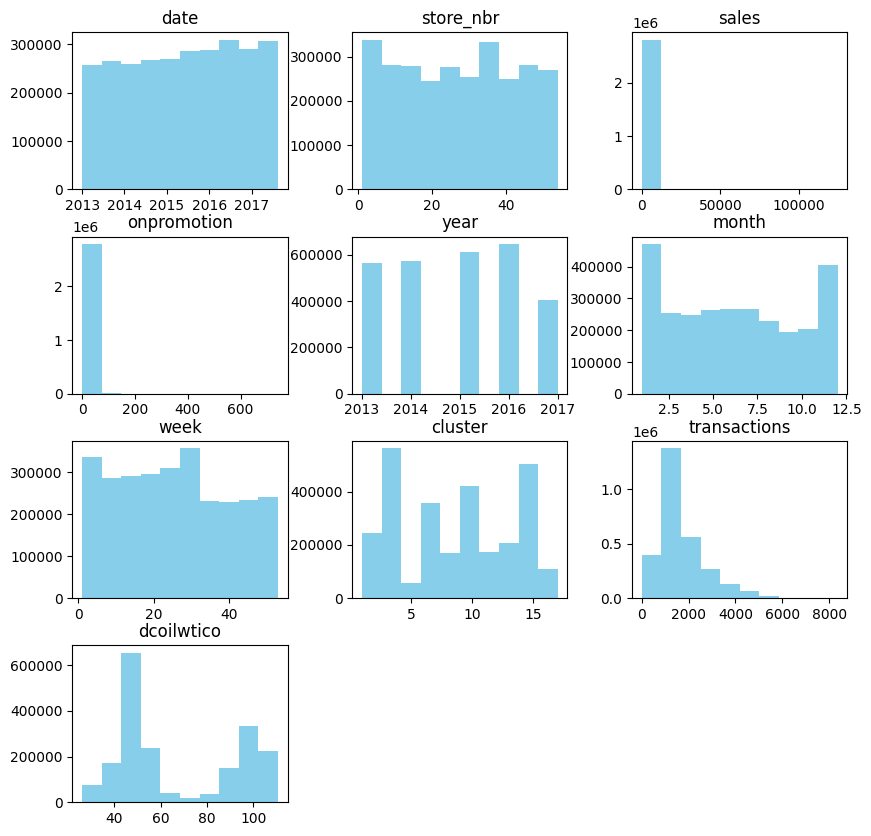

In [59]:
#plot the histograph for the  numerical columns
merged_data.hist(figsize=(10,10), grid=False, color='skyblue')
plt.show()

In [62]:
# Select only numerical columns
numerical_df = merged_data.select_dtypes(include=['number'])
numerical_df


,store_nbr,sales,onpromotion,year,month,week,cluster,transactions,dcoilwtico
0,25,0.000,0,2013,1,1,1,770,NaN
1,25,0.000,0,2013,1,1,1,770,NaN
2,25,2.000,0,2013,1,1,1,770,NaN
3,25,810.000,0,2013,1,1,1,770,NaN
4,25,0.000,0,2013,1,1,1,770,NaN
...,...,...,...,...,...,...,...,...,...
2805226,9,438.133,0,2017,8,33,6,2155,47.57
2805227,9,154.553,1,2017,8,33,6,2155,47.57
2805228,9,2419.729,148,2017,8,33,6,2155,47.57
2805229,9,121.000,8,2017,8,33,6,2155,47.57


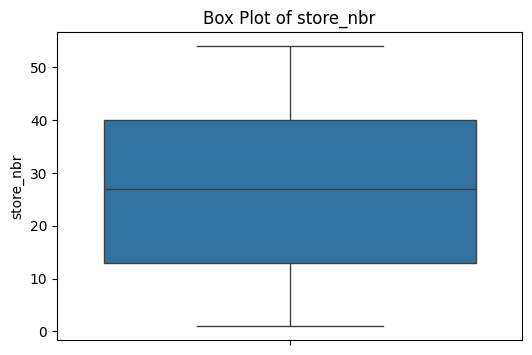

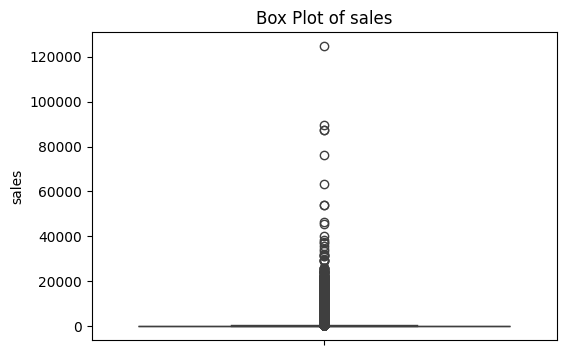

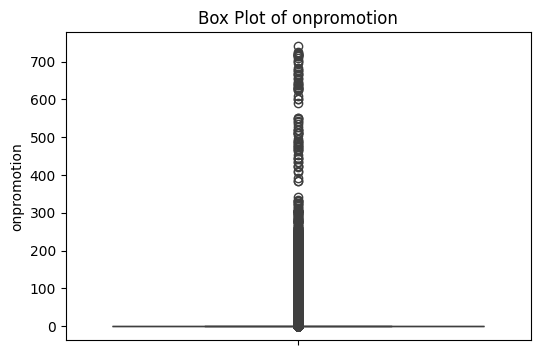

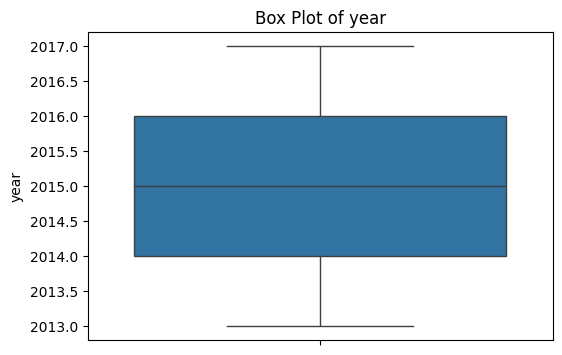

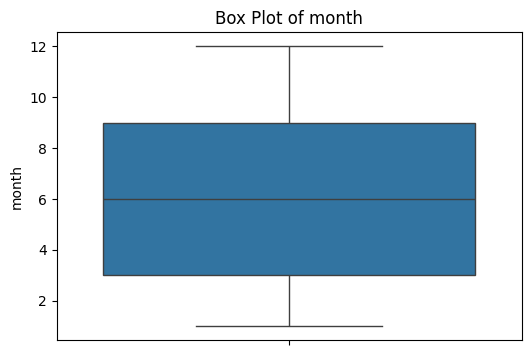

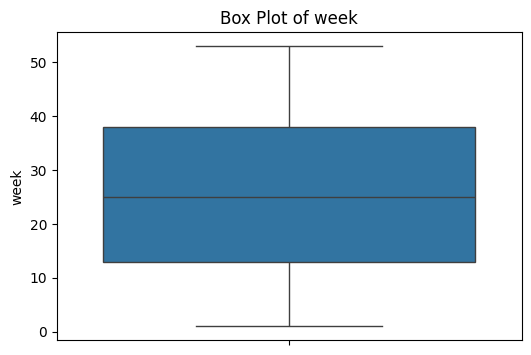

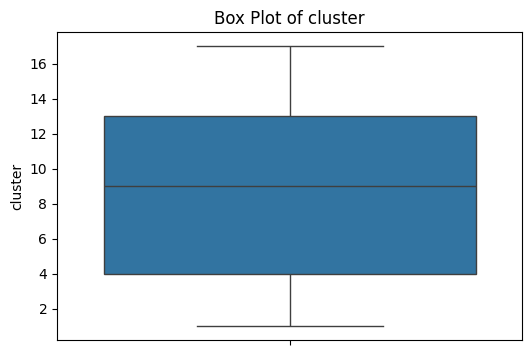

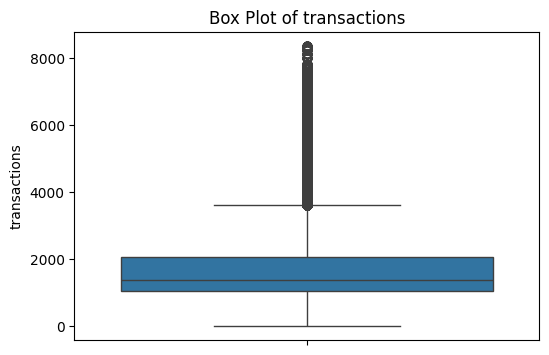

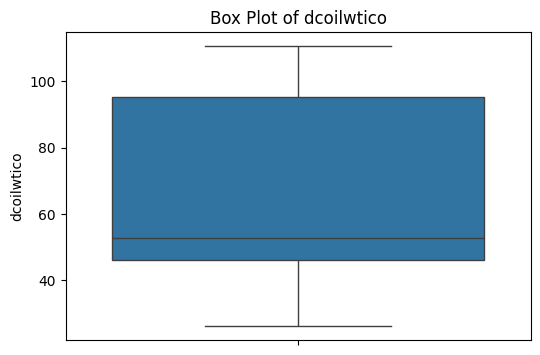

In [65]:
# Plotting box plots for each numerical column separately
for column in numerical_df.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=numerical_df[column])
    plt.title(f'Box Plot of {column}')
    plt.show()

**General Observations:**
- Right-Skewness: Many columns, particularly sales, transactions, and onpromotion, show right-skewed distributions. This indicates that these columns have many low values and a few high-value outliers.
- Uniform Distributions: Columns like store_nbr, year, and month show more uniform distributions, suggesting consistent data collection practices.
- Trends Over Time: The date column shows a trend of increasing entries over the years, which could indicate growing data collection efforts or business activity over time.
- Multimodality: The dcoilwtico column's distribution suggests multiple peaks, indicating that the data may have several distinct value ranges or categories.
- outliers: there are outliers in transactions, onpromotion and sales columns